# EDR Overview LSS Plots

This notebook creates the plots for the LSS Catalog section of the EDR Overview paper, plus a few extras:

Running this notebook generates plots in `edrpaper/nb/temp_figures/`, which is not part of
the GitHub versioning.  When you are satisfied with the plots, copy them to `edrpaper/nb/generated_figures/`
which is versioned, and upload them to the Overleaf document.

Currently the plots used in the paper are:
* ELGcomp_rosette1.png
* BGSntile_rosette1.png
* nzall_logy.png

Code originally from Ashley Ross, with cosmetic updates from Stephen Bailey.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import fitsio

In [2]:
# this will become /global/cfs/cdirs/desi/public/edr/vac/edr/lss/v2.0
sv3dir = '/global/cfs/cdirs/desi/survey/catalogs/edr_prepfor_public/'
#ORIG sv3dir = '/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/'
#ORIG xidir = '/global/cfs/cdirs/desi/survey/catalogs/edav1/xi/sv3/'
# outdir = '/global/cfs/cdirs/desi/survey/catalogs/SV3/keyplots/'
outdir = './temp_figures/'

In [3]:
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [4]:
elgs = fitsio.read(sv3dir+'LSScats/full/ELG_full.dat.fits')

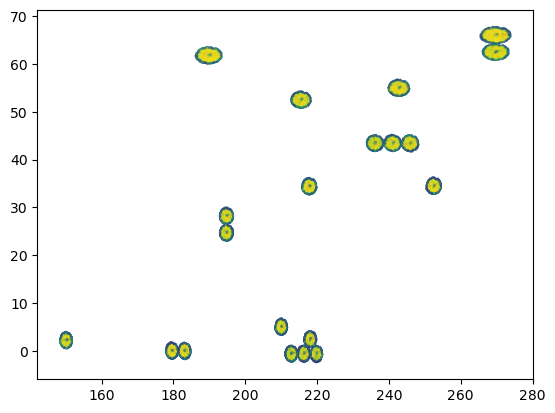

In [5]:
plt.scatter(elgs['RA'],elgs['DEC'],c=elgs['COMP_TILE'],s=.001)
plt.show()

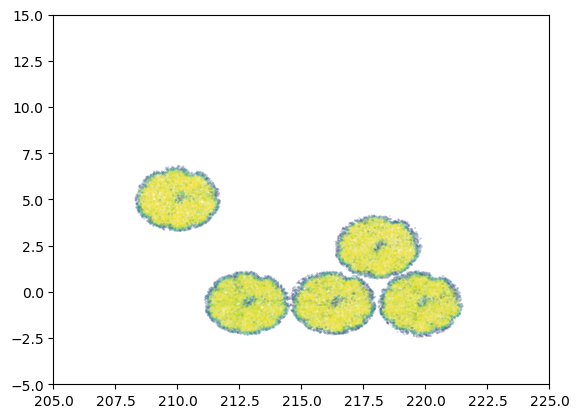

In [6]:
plt.scatter(elgs['RA'],elgs['DEC'],c=elgs['COMP_TILE'],s=.001)
plt.xlim(205,225)
plt.ylim(-5,15)
plt.show()

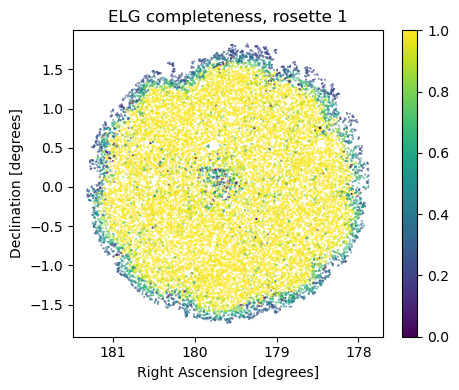

In [7]:
sel = elgs['ROSETTE_NUMBER'] == 1
plt.figure(figsize=(4.8,4))
plt.scatter(elgs['RA'][sel],elgs['DEC'][sel],c=elgs['COMP_TILE'][sel],s=.1)
plt.title('ELG completeness, rosette 1')
plt.xlabel('Right Ascension [degrees]')
plt.ylabel('Declination [degrees]')
plt.colorbar()
xmin, xmax = plt.xlim()
plt.xlim(xmax, xmin)  #- reverse RA axes
plt.tight_layout()
plt.savefig(outdir+'ELGcomp_rosette1.pdf')
plt.savefig(outdir+'ELGcomp_rosette1.png', dpi=200)
plt.show()

In [8]:
zenodo = Table()
elgs['ROSETTE_NUMBER'] == 1
zenodo['RA'] = elgs['RA'][sel]
zenodo['DEC'] = elgs['DEC'][sel]
zenodo['COMPLETENESS'] = elgs['COMP_TILE'][sel]
outfile = 'ELG_completeness_rosette1.csv'
zenodo.write(outfile, overwrite=True)
print(f'Wrote {outfile} for zenodo')

Wrote ELG_completeness_rosette1.csv for zenodo


In [9]:
len(np.unique(elgs['TILEID']))

239

In [10]:
for ros in np.unique(elgs['ROSETTE_NUMBER']):
    sel = elgs['ROSETTE_NUMBER'] == ros
    print(ros,len(np.unique(elgs[sel]['TILEID'])),np.mean(elgs[sel]['PROB_OBS']),np.mean(elgs[sel]['COMP_TILE']),np.sum(elgs[sel]['LOCATION_ASSIGNED'])/len(elgs[sel]))

0 12 0.8777382488792284 0.8691301000769823 0.8691301000769823
1 12 0.8805435117527951 0.8728761334624526 0.8728761334624526
2 12 0.8678829951102925 0.8595798798403719 0.8595798798403719
3 13 0.892556796933433 0.8845674395412615 0.8845674395412615
4 12 0.8886578953819002 0.874693597411511 0.874693597411511
5 12 0.8658877688736714 0.8538839642061925 0.8538839642061925
6 12 0.8851387022461125 0.872672297945863 0.872672297945863
7 12 0.8873010227164492 0.8791313458424612 0.8791313458424612
8 12 0.8398480063763671 0.8284434400096855 0.8284434400096856
9 12 0.8523781758634379 0.8387852322350139 0.8387852322350139
10 12 0.85561954426035 0.8411373363278105 0.8411373363278105
11 12 0.8926877543016815 0.8859748026864062 0.8859748026864062
12 12 0.8737394286931127 0.8610367486006327 0.8610367486006327
13 12 0.883917695989619 0.875624326706493 0.875624326706493
14 13 0.877042471898466 0.8687059473902428 0.8687059473902428
15 13 0.881777000417297 0.8729852381200772 0.8729852381200772
16 11 0.870339

In [11]:
elgcn = fitsio.read(sv3dir+'LSScats/clustering/ELG_N_clustering.dat.fits')
elgcs = fitsio.read(sv3dir+'LSScats/clustering/ELG_S_clustering.dat.fits')
elgc = np.concatenate([elgcn,elgcs])
elgc.dtype.names

('RA',
 'DEC',
 'TARGETID',
 'NTILE',
 'TILES',
 'Z',
 'COMP_TILE',
 'ROSETTE_NUMBER',
 'ROSETTE_R',
 'FRACZ_TILELOCID',
 'BITWEIGHTS',
 'PROB_OBS',
 'WEIGHT_ZFAIL',
 'WEIGHT',
 'NZ',
 'WEIGHT_FKP')

In [12]:
for ros in np.unique(elgc['ROSETTE_NUMBER']):
    sel = elgc['ROSETTE_NUMBER'] == ros
    print(ros,np.mean(elgc[sel]['COMP_TILE']),np.mean(elgc[sel]['PROB_OBS']))

0 0.9300475946707369 0.957633051691598
1 0.9363766680397695 0.9613262762736637
2 0.9307363427518042 0.9571726315974418
3 0.9495792053422973 0.970318287037037
4 0.9330118055459833 0.9639522464167586
5 0.9215967819654092 0.9536709923595017
6 0.9323237746065471 0.9621976370246085
7 0.935709951838644 0.9619119857739972
8 0.9105343704834038 0.9437537772909269
9 0.9107741807541797 0.9454595926528879
10 0.9185941502009374 0.950661552145875
11 0.9421567556797305 0.9636612648483014
12 0.9274471977168635 0.9582192081253899
13 0.9356178337961286 0.9598634628797272
14 0.9411032139801975 0.9616460268083872
15 0.9439570355090274 0.9648998453971943
16 0.9207088313537564 0.953036337104236
17 0.9036958326655178 0.9401837052580979
18 0.9273758818773932 0.9613937243203077
19 0.9217716910014004 0.9586304530201343


In [13]:
bgs = fitsio.read(sv3dir+'LSScats/full/BGS_ANY_full.dat.fits')

In [14]:
for ros in np.unique(bgs['ROSETTE_NUMBER']):
    sel = bgs['ROSETTE_NUMBER'] == ros
    print(ros,len(np.unique(bgs[sel]['TILEID'])),np.mean(bgs[sel]['PROB_OBS']),np.mean(bgs[sel]['COMP_TILE']),np.sum(bgs[sel]['LOCATION_ASSIGNED'])/len(bgs[sel]))

0 10 0.9432780573052696 0.9350898755569211 0.9350898755569211
1 11 0.946328271379818 0.9365631691648822 0.9365631691648822
2 11 0.9441933615769448 0.9363021420518602 0.9363021420518602
3 11 0.9449663128424106 0.9313567515307767 0.9313567515307767
4 10 0.9373474695141727 0.9297528702082117 0.9297528702082117
5 10 0.9322384477322799 0.9226620071412293 0.9226620071412293
6 11 0.9542894203244274 0.9474236641221374 0.9474236641221374
7 11 0.9438504447059731 0.932319802438648 0.932319802438648
8 11 0.9496124929363565 0.9432789432789432 0.9432789432789432
9 11 0.9543374537489528 0.9427534208321697 0.9427534208321697
10 10 0.9360804021214701 0.9282673478075777 0.9282673478075777
11 11 0.9397324338417417 0.9240646591057229 0.9240646591057229
12 11 0.9547580610673965 0.9420116318850497 0.9420116318850497
13 11 0.9442985225808639 0.9341560995456704 0.9341560995456704
14 11 0.9478527929441412 0.9389332213355733 0.9389332213355733
15 11 0.9529321755573248 0.9440021231422505 0.9440021231422505
16 10

In [15]:
np.mean(elgs['COMP_TILE'])

0.8629399833504277

In [16]:
len(np.unique(bgs['TILEID']))

214

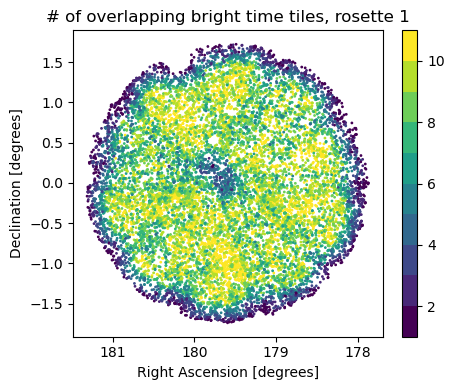

In [17]:
sel = bgs['ROSETTE_NUMBER'] == 1
cmap = plt.get_cmap('viridis', 10)
plt.figure(figsize=(4.8,4))
plt.scatter(bgs['RA'][sel],bgs['DEC'][sel],c=bgs['NTILE'][sel],s=1,cmap=cmap)
plt.title('# of overlapping bright time tiles, rosette 1')
plt.xlabel('Right Ascension [degrees]')
plt.ylabel('Declination [degrees]')
plt.colorbar()
xmin, xmax = plt.xlim()
plt.xlim(xmax, xmin)  #- reverse RA axes
plt.tight_layout()
plt.savefig(outdir+'BGSntile_rosette1.pdf')
plt.savefig(outdir+'BGSntile_rosette1.png', dpi=200)
plt.show()

In [18]:
sel = bgs['ROSETTE_NUMBER'] == 1
zenodo = Table()
zenodo['RA'] = bgs['RA'][sel]
zenodo['DEC'] = bgs['DEC'][sel]
zenodo['NTILE'] = bgs['NTILE'][sel]
outfile = 'BGS_tilecoverage_rosette1.csv'
zenodo.write(outfile, overwrite=True)
print(f'Wrote {outfile} for zenodo')

Wrote BGS_tilecoverage_rosette1.csv for zenodo


In [19]:
tps = ['ELG','ELG_HIP','ELGnotqso','ELG_HIPnotqso','LRG','LRG_main','QSO','BGS_ANY','BGS_BRIGHT']
for tp in tps:
    cn = fitsio.read(sv3dir+'LSScats/clustering/'+tp+'_N_clustering.dat.fits')
    cs = fitsio.read(sv3dir+'LSScats/clustering/'+tp+'_S_clustering.dat.fits')
    c = np.concatenate([cn,cs])
    ff = fitsio.read(sv3dir+'LSScats/full/'+tp+'_full.dat.fits')
    
    print(tp,len(cn),len(cs),len(c),np.min(c['Z']),np.max(c['Z']),np.sum(ff['LOCATION_ASSIGNED'])/len(ff))


ELG 129724 137621 267345 0.6000183630295214 1.599988227710708 0.8629399833504275
ELG_HIP 103135 106698 209833 0.6000183630295214 1.599988227710708 0.8876766241528243
ELGnotqso 125249 134068 259317 0.6000183630295214 1.599988227710708 0.8755258990619665
ELG_HIPnotqso 99149 103585 202734 0.6000183630295214 1.599988227710708 0.9009138436949056
LRG 54880 57769 112649 0.4000030496582913 1.0999650887883332 0.954592595932723
LRG_main 41812 44228 86040 0.4000030496582913 1.0999650887883332 0.9535097813578827
QSO 17609 17957 35566 0.6001445411452242 3.4997594641731204 0.9837761417906588
BGS_ANY 113691 128055 241746 0.010397865772879194 0.5997362739291541 0.9372539843682186
BGS_BRIGHT 67972 75881 143853 0.010397865772879194 0.59899602949955 0.9566554846063181


In [20]:
tps = ['ELG','ELG_HIP','ELGnotqso','ELG_HIPnotqso','LRG','QSO','BGS_ANY','BGS_BRIGHT']
for tp in tps:
    ff = fitsio.read(sv3dir+'LSScats/full/'+tp+'_0_full.ran.fits')
    ffn = fitsio.read(sv3dir+'LSScats/clustering/'+tp+'_N_0_clustering.ran.fits')
    ffs = fitsio.read(sv3dir+'LSScats/clustering/'+tp+'_S_0_clustering.ran.fits')
    print(tp,len(ff)/2500.,len(ffn)/2500.,len(ffs)/2500.,len(ffs)/len(ffn),(len(ffs)+len(ffn))/2500.)


ELG 168.5348 84.0128 84.5056 1.0058657728346156 168.5184
ELG_HIP 168.6412 84.08 84.542 1.0054947668886776 168.622
ELGnotqso 164.5184 81.9568 82.5512 1.0072526013704781 164.508
ELG_HIPnotqso 164.3104 81.8544 82.4416 1.0071737133251237 164.296
LRG 166.804 81.8748 84.9092 1.0370614645776235 166.784
QSO 174.5548 86.4412 88.1136 1.0193472557067695 174.5548
BGS_ANY 173.8208 86.4016 87.3556 1.0110414621951445 173.7572
BGS_BRIGHT 173.5548 86.2884 87.204 1.0106109280042277 173.4924


In [21]:
0.02*2500

50.0

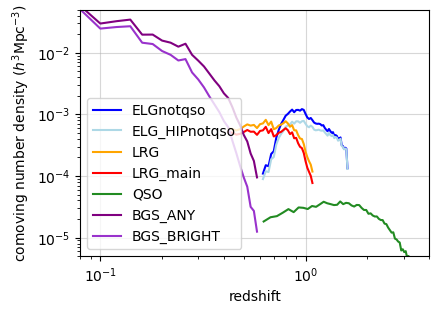

In [45]:
tps = ['ELGnotqso','ELG_HIPnotqso','LRG','LRG_main','QSO','BGS_ANY','BGS_BRIGHT']
clrs = ['b','lightblue','orange','red','forestgreen','purple','darkorchid']
plt.figure(figsize=(4.5,3.2))
for tp,cl in zip(tps,clrs):
    nzn = np.loadtxt(sv3dir+'LSScats/'+tp+'_N_nz.txt').transpose()
    nzs = np.loadtxt(sv3dir+'LSScats/'+tp+'_S_nz.txt').transpose()
    nzt = (nzn+nzs)/2.
    sel = np.ones(len(nzt[0]),dtype=bool)
    if tp[:3] == 'LRG':
        sel = nzt[0] > 0.4
        sel &= nzt[0] < 1.1
    if tp[:3] == 'BGS':
        #sel = nzt[0] > 0.4
        sel = nzt[0] < 0.6
    if tp[:3] == 'ELG':
        #sel = nzt[0] > 0.4
        sel = nzt[0] > 0.6

    plt.plot(nzt[0][sel],nzt[3][sel],color=cl,label=tp)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.08,4)
plt.ylim(.5e-5,5e-2)
plt.grid()
plt.legend()
plt.ylabel(r'comoving number density ($h^3$Mpc$^{-3}$)')
plt.xlabel('redshift')
plt.show()
      


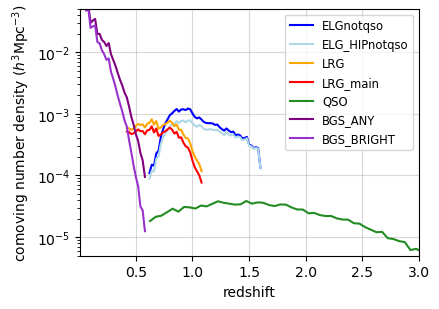

In [48]:
tps = ['ELGnotqso','ELG_HIPnotqso','LRG','LRG_main','QSO','BGS_ANY','BGS_BRIGHT']
clrs = ['b','lightblue','orange','red','forestgreen','purple','darkorchid']

zenodo = dict()

plt.figure(figsize=(4.5,3.2))
for tp,cl in zip(tps,clrs):
    nzn = np.loadtxt(sv3dir+'LSScats/'+tp+'_N_nz.txt').transpose()
    nzs = np.loadtxt(sv3dir+'LSScats/'+tp+'_S_nz.txt').transpose()
    nzt = (nzn+nzs)/2.
    sel = np.ones(len(nzt[0]),dtype=bool)
    if tp[:3] == 'LRG':
        sel = nzt[0] > 0.4
        sel &= nzt[0] < 1.1
    if tp[:3] == 'BGS':
        #sel = nzt[0] > 0.4
        sel = nzt[0] < 0.6
    if tp[:3] == 'ELG':
        #sel = nzt[0] > 0.4
        sel = nzt[0] > 0.6

    zenodo[tp] = dict(z=list(nzt[0][sel].round(2)), nz=list(nzt[3][sel]))
        
    plt.plot(nzt[0][sel],nzt[3][sel],color=cl,label=tp)

plt.yscale('log')
#plt.xscale('log')
plt.xlim(0.01,3.)
plt.ylim(.5e-5,5e-2)
plt.grid()
plt.legend(fontsize='small')
plt.ylabel(r'comoving number density ($h^3$Mpc$^{-3}$)')
plt.xlabel('redshift')
plt.tight_layout()
plt.savefig(outdir+'nzall_logy.pdf')
plt.show()


In [49]:
import json

outfile = 'lss_nz.json'
with open(outfile, 'w') as fp:
    json.dump(zenodo, fp)
    
print(f'Wrote {outfile} for zenodo')

Wrote lss_nz.json for zenodo


## k-correct polynomials

Adapted from Sam Moore

In [25]:
# EDR Overview Paper table 9
# reformatted from https://github.com/desihub/LSS/blob/main/py/LSS/DESI_ke/data/ajs_kcorr_rband_z01.dat

# 'gmr_min', 'gmr_max', 'A0', 'A1', 'A2', 'A3', 'A4', 'gmr_med'
kdata = np.array([
[-100, 0.18, -45.32783517, 35.27660354, -6.60434164, -0.480538,   -0.10348171, 0.130634],
[0.18, 0.35, -20.07718761, 20.14480008, -4.6200285 , -0.04824625, -0.10348171, 0.298124],
[0.35, 0.52, -10.98217672, 14.35677081, -3.67641154,  0.33946073, -0.10348171, 0.443336],
[0.52, 0.69,  -3.42775232,  9.47765132, -2.70330179,  0.76463324, -0.10348171, 0.603434],
[0.69, 0.86,   6.71683404,  3.25021491, -1.17611261,  1.11334705, -0.10348171, 0.784644],
[0.86, 1.03,  16.76083847, -2.51354452,  0.35130908,  1.30680013, -0.10348171, 0.933226],
[1.03, 100.,  20.30236651, -4.18856337,  0.56185062,  1.49435891, -0.10348171, 1.06731],
])

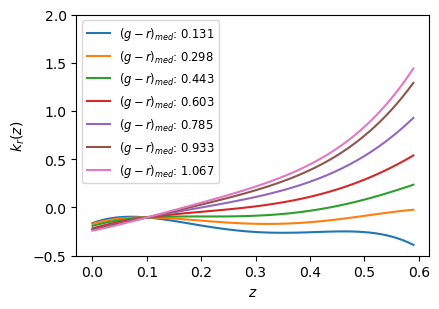

In [42]:
### z = np.linspace(0, 0.6)
z = np.arange(0,0.6, 0.01)
zref = 0.1

# EDR Overview Paper Figure 6 plotting equation 7 on data from table 9
plt.figure(figsize=(4.5,3.2))
for i in range(kdata.shape[0]):
    a = kdata[i][2:2+5]       # a coefficients
    med_gr = kdata[i][7]      # median (g-r)
    k = np.zeros(len(z))
    for j in range(len(a)):
        k += a[j] * (z-zref)**(4-j)

    plt.plot(z, k, label=f'$(g-r)_{{med}}$: {med_gr:.3f}')

plt.legend(fontsize='small')
plt.ylim(-0.5, 2.0)
plt.xlabel('$z$')
plt.ylabel(r'$k_r(z)$')
plt.tight_layout()
plt.savefig(outdir+'kcorr.pdf')
plt.show()
